# Steam Data for supervised machine learning

In [126]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

### importing csv

In [157]:
# **************** i have added 2 columns in excel %_pos_rating and total_number_of_ratings *****************************

# Import the data
steam_data = pd.read_csv(Path('Data/steam.csv'))
steam_data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,%_pos_rating,negative_ratings,total_number_of_ratings,median_playtime,owners,price
0,10,Counter-Strike,01/11/2000,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,97,3339,127873,317,10000000-20000000,7.19
1,20,Team Fortress Classic,01/04/1999,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,84,633,3951,62,5000000-10000000,3.99
2,30,Day of Defeat,01/05/2003,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,90,398,3814,34,5000000-10000000,3.99
3,40,Deathmatch Classic,01/06/2001,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,83,267,1540,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,01/11/1999,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,95,288,5538,415,5000000-10000000,3.99


### counting number of steamspy_tags and converting to numerical data

In [162]:
replace_steamspy_tags_column = steam_data["steamspy_tags"].str.count(";")+1

In [164]:
new_steamspy_tag_data = steam_data['steamspy_tags'] = replace_steamspy_tags_column
new_steamspy_tag_data.head()

0    3
1    3
2    3
3    3
4    3
Name: steamspy_tags, dtype: int64

In [170]:
#steam_data.head()

In [166]:
steam_data.describe()

,appid,english,required_age,steamspy_tags,achievements,positive_ratings,%_pos_rating,negative_ratings,total_number_of_ratings,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,2.707500e+04,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,2.880960,45.248864,1.000559e+03,71.460462,211.027147,1.211586e+03,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,0.382222,352.670281,1.898872e+04,23.363417,4284.938531,2.242909e+04,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,3.000000,0.000000,6.000000e+00,58.000000,2.000000,1.000000e+01,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,3.000000,7.000000,2.400000e+01,76.000000,9.000000,3.600000e+01,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,3.000000,23.000000,1.260000e+02,89.000000,42.000000,1.760000e+02,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,3.000000,9821.000000,2.644404e+06,100.000000,487076.000000,3.046717e+06,190625.00000,421.990000


###  counting number of categories and converting to numerical data

In [167]:
replace_categories_column = steam_data["categories"].str.count(";")+1

In [168]:
new_categories_data = steam_data['categories'] = replace_categories_column
new_categories_data.head()

0    4
1    4
2    2
3    4
4    3
Name: categories, dtype: int64

In [169]:
steam_data.describe()

,appid,english,required_age,categories,steamspy_tags,achievements,positive_ratings,%_pos_rating,negative_ratings,total_number_of_ratings,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,2.707500e+04,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,3.313980,2.880960,45.248864,1.000559e+03,71.460462,211.027147,1.211586e+03,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,2.235836,0.382222,352.670281,1.898872e+04,23.363417,4284.938531,2.242909e+04,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,2.000000,3.000000,0.000000,6.000000e+00,58.000000,2.000000,1.000000e+01,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,3.000000,3.000000,7.000000,2.400000e+01,76.000000,9.000000,3.600000e+01,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,4.000000,3.000000,23.000000,1.260000e+02,89.000000,42.000000,1.760000e+02,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,18.000000,3.000000,9821.000000,2.644404e+06,100.000000,487076.000000,3.046717e+06,190625.00000,421.990000


In [128]:
steam_data.isnull().values.any()

False

In [129]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   appid                    27075 non-null  int64  
 1   name                     27075 non-null  object 
 2   release_date             27075 non-null  object 
 3   english                  27075 non-null  int64  
 4   developer                27075 non-null  object 
 5   publisher                27075 non-null  object 
 6   platforms                27075 non-null  object 
 7   required_age             27075 non-null  int64  
 8   categories               27075 non-null  object 
 9   genres                   27075 non-null  object 
 10  steamspy_tags            27075 non-null  object 
 11  achievements             27075 non-null  int64  
 12  positive_ratings         27075 non-null  int64  
 13  %_pos_rating             27075 non-null  int64  
 14  negative_ratings      

In [130]:
import matplotlib.pyplot as plt

KeyError: 'average_playtime'

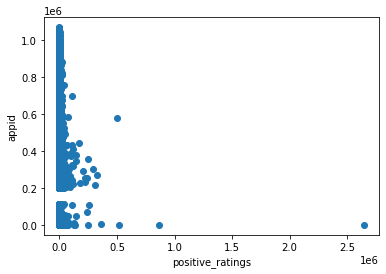

In [173]:
# Plot the positive_ratings & appid to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(steam_data['positive_ratings'], steam_data['appid'])
plt.xlabel("positive_ratings")
plt.ylabel("appid")

plt.scatter(steam_data['positive_ratings'], steam_data['average_playtime'])
plt.xlabel("positive_ratings")
plt.ylabel("average_playtime")

In [ ]:

# Plot the negative_ratings & average_playtime to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(steam_data['negative_ratings'], steam_data['average_playtime'])
plt.xlabel("negative_ratings")
plt.ylabel("average_playtime")


In [ ]:
# Plot the negative_ratings & average_playtime to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(steam_data['positive_ratings'], steam_data['price'])
plt.xlabel("positive_ratings")
plt.ylabel("price")

In [ ]:
# Plot the negative_ratings & appid to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(steam_data['negative_ratings'], steam_data['price'])
plt.xlabel("negative_ratings")
plt.ylabel("price")

In [ ]:
import seaborn

In [132]:
#seaborn.PairGrid(steam_data).steam_data_upper(plt.scatter)

In [133]:
#team_data.positive_ratings.unique()

In [147]:
new_steam_data = steam_data.drop(["appid","name","release_date","developer","publisher","platforms",
    "categories","genres", "steamspy_tags", "owners","positive_ratings","negative_ratings"], axis =1)


In [148]:
new_steam_data.head()

,english,required_age,achievements,%_pos_rating,total_number_of_ratings,median_playtime,price
0,1,0,0,97,127873,317,7.19
1,1,0,0,84,3951,62,3.99
2,1,0,0,90,3814,34,3.99
3,1,0,0,83,1540,184,3.99
4,1,0,0,95,5538,415,3.99


In [ ]:
# added coloun in excel for % ratings positive and total number of ratings

In [149]:
new_steam_data.head()

,english,required_age,achievements,%_pos_rating,total_number_of_ratings,median_playtime,price
0,1,0,0,97,127873,317,7.19
1,1,0,0,84,3951,62,3.99
2,1,0,0,90,3814,34,3.99
3,1,0,0,83,1540,184,3.99
4,1,0,0,95,5538,415,3.99


In [144]:
new_steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   english                  27075 non-null  int64  
 1   required_age             27075 non-null  int64  
 2   achievements             27075 non-null  int64  
 3   positive_ratings         27075 non-null  int64  
 4   %_pos_rating             27075 non-null  int64  
 5   negative_ratings         27075 non-null  int64  
 6   total_number_of_ratings  27075 non-null  int64  
 7   median_playtime          27075 non-null  int64  
 8   price                    27075 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 1.9 MB


In [ ]:
# np.unique(y)

In [174]:
# Split the data into X_train, X_test, y_train, y_test
y = new_steam_data['%_pos_rating'].values
X = new_steam_data.drop('%_pos_rating', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [175]:
# Train a Logistic Regression model print the model score
logistic_regression = LogisticRegression().fit(X_train, y_train)

print('LogisticRegression Training score: ', logistic_regression.score(X_train,y_train))
print('LogisticRegression Test score: ', logistic_regression.score(X_test, y_test))

LogisticRegression Training score:  0.03580222594307101
LogisticRegression Test score:  0.03176244644703797


C:\Users\VAIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
# ************does not work with positive ratings or price but no error with 'achievements' ***************

In [113]:
new_steam_data['achievements'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
27070     7
27071     0
27072    24
27073     0
27074     0
Name: achievements, Length: 27075, dtype: int64>

In [114]:
new_steam_data['price'].unique

<bound method Series.unique of 0        7.19
1        3.99
2        3.99
3        3.99
4        3.99
         ... 
27070    2.09
27071    1.69
27072    3.99
27073    5.19
27074    5.19
Name: price, Length: 27075, dtype: float64>

In [117]:
# Train a Random Forest Classifier model and print the model score
RandomForest_classifier = RandomForestClassifier(random_state=1)
RandomForest_classifier.fit(X_train, y_train)
print('RandomForestClassifier Training score: ', RandomForest_classifier.score(X_train,y_train))
print('RandomForestClassifier Test score: ', RandomForest_classifier.score(X_test,y_test))

RandomForestClassifier Training score:  1.0
RandomForestClassifier Test score:  0.374649135765992


In [118]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
# Train the Logistic Regression model on the scaled data and print the model score
scaled_logistic = LogisticRegression(
    solver='lbfgs',
    max_iter=100,
    random_state=1
)
scaled_logistic.fit(X_train_scaled, y_train)

print('Scaled LogisticRegression Training score: ', scaled_logistic.score(X_train_scaled, y_train))
print('Scaled LogisticRegression Test score: ',scaled_logistic.score(X_test_scaled, y_test))

C:\Users\VAIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaled LogisticRegression Training score:  0.43868807249088937
Scaled LogisticRegression Test score:  0.43182153937066037


In [120]:
# Train a Random Forest Classifier model on the scaled data and print the model score
scaled_random_forest = RandomForestClassifier(random_state=0)
scaled_random_forest.fit(X_train_scaled, y_train)
print('Scaled RandomForestClassifier Training score: ', scaled_random_forest.score(X_train_scaled,y_train))
print('Scaled RandomForestClassifier Test score: ', scaled_random_forest.score(X_test_scaled, y_test))

Scaled RandomForestClassifier Training score:  1.0
Scaled RandomForestClassifier Test score:  0.37568326192938395
